In [19]:
from utility_based_random_under_sampler import UtilityBasedRandomUnderSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
pd.set_option('display.max_rows',100)
data = pd.read_csv('test/ImbR.csv', index_col=0)
data

,X1,X2,Tgt
0,8.598811,9.646846,10.147398
1,9.424556,7.486556,12.117065
2,13.896771,10.390389,10.000030
3,10.176271,10.584084,10.679731
4,10.323219,10.888969,10.035441
...,...,...,...
995,1.099347,7.417908,20.084010
996,1.700612,13.693203,20.477744
997,2.528996,14.303922,20.144063
998,2.616128,5.795239,20.049739


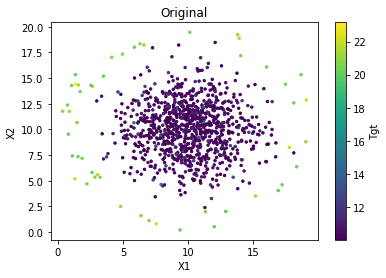

In [21]:
x = data['X1'].to_numpy()
y = data['X2'].to_numpy()
color = data['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original')
plt.show()

# Testing c_perc as 'balance' with 'extremes' as relevance func

In [22]:
under1 = UtilityBasedRandomUnderSampler(data, thr_rel=0.5)
method = under1.getMethod()
extrType = under1.getExtrType()
thr_rel = under1.getThrRel()
controlPtr = under1.getControlPtr()
c_perc = under1.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('extremes', 'both', 0.5, [], 'balance')

In [23]:
resampled = under1.resample()
resampled

,X1,X2,Tgt
0,8.598811,9.646846,10.147398
1,9.424556,7.486556,12.117065
3,10.176271,10.584084,10.679731
4,10.323219,10.888969,10.035441
5,14.287662,5.945354,10.738249
...,...,...,...
995,1.099347,7.417908,20.084010
996,1.700612,13.693203,20.477744
997,2.528996,14.303922,20.144063
998,2.616128,5.795239,20.049739


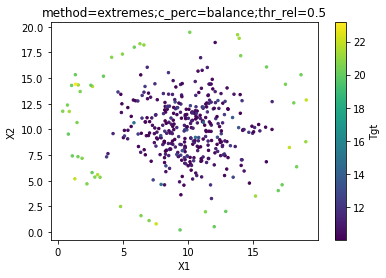

In [24]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("method=extremes;c_perc=balance;thr_rel=0.5")
plt.show()

# Testing c_perc as 'extreme' with 'extremes' as relevance func

In [25]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
under2 = UtilityBasedRandomUnderSampler(data, thr_rel=0.5, c_perc='extreme')
method = under2.getMethod()
extrType = under2.getExtrType()
thr_rel = under2.getThrRel()
controlPtr = under2.getControlPtr()
c_perc = under2.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('extremes', 'both', 0.5, [], 'extreme')

In [26]:
resampled = under2.resample()
resampled

,X1,X2,Tgt
1,9.424556,7.486556,12.117065
8,8.282868,6.447229,12.974201
19,8.818021,8.547332,11.283378
32,12.237814,9.236326,12.948047
35,11.721601,8.076288,10.014534
...,...,...,...
995,1.099347,7.417908,20.084010
996,1.700612,13.693203,20.477744
997,2.528996,14.303922,20.144063
998,2.616128,5.795239,20.049739


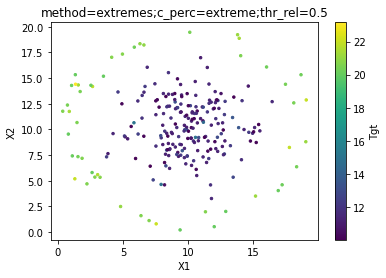

In [27]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("method=extremes;c_perc=extreme;thr_rel=0.5")
plt.show()

# Testing c_perc as percentage list with 'extremes' as relevance func

In [28]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
under3 = UtilityBasedRandomUnderSampler(data, thr_rel=0.5, c_perc=[0.5])
method = under3.getMethod()
extrType = under3.getExtrType()
thr_rel = under3.getThrRel()
controlPtr = under3.getControlPtr()
c_perc = under3.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('extremes', 'both', 0.5, [], [0.5])

In [29]:
resampled = under3.resample()
resampled

,X1,X2,Tgt
0,8.598811,9.646846,10.147398
1,9.424556,7.486556,12.117065
5,14.287662,5.945354,10.738249
8,8.282868,6.447229,12.974201
9,8.885845,12.388414,10.002812
...,...,...,...
995,1.099347,7.417908,20.084010
996,1.700612,13.693203,20.477744
997,2.528996,14.303922,20.144063
998,2.616128,5.795239,20.049739


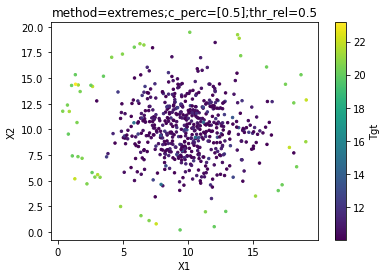

In [30]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("method=extremes;c_perc=[0.5];thr_rel=0.5")
plt.show()

# Testing 'range' + c_perc='balance'

In [31]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
under4 = UtilityBasedRandomUnderSampler(data, method = 'range', thr_rel=0.5, 
                                         controlPts=[[14,0,0],[15,1,0],[16,0,0],[20,1,0],[21,0,0]])
method = under4.getMethod()
extrType = under4.getExtrType()
thr_rel = under4.getThrRel()
controlPtr = under4.getControlPtr()
c_perc = under4.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('range',
 '',
 0.5,
 [[14, 0, 0], [15, 1, 0], [16, 0, 0], [20, 1, 0], [21, 0, 0]],
 'balance')

In [32]:
resampled = under4.resample()
resampled

,X1,X2,Tgt
15,14.467283,10.174416,10.017315
25,5.783267,7.253775,10.503653
198,8.472085,8.628432,11.028440
286,10.552549,9.223725,14.908881
371,5.872378,5.014803,10.304774
426,15.993631,6.844514,10.140461
494,7.817322,10.852895,10.265283
554,14.129788,12.800888,11.984237
591,11.162420,10.697902,14.502092
595,7.110209,13.944630,10.231103


In [33]:
len(resampled)

52

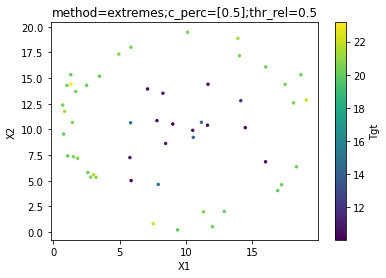

In [34]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("method=extremes;c_perc=[0.5];thr_rel=0.5")
plt.show()

# Testing 'range' + c_perc='extreme'

In [35]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
under_extreme = UtilityBasedRandomUnderSampler(data, method = 'range', thr_rel=0.5, 
                                         controlPts=[[14,0,0],[15,1,0],[16,0,0],[20,1,0],[21,0,0]], c_perc='extreme')
method = under_extreme.getMethod()
extrType = under_extreme.getExtrType()
thr_rel = under_extreme.getThrRel()
controlPtr = under_extreme.getControlPtr()
c_perc = under_extreme.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('range',
 '',
 0.5,
 [[14, 0, 0], [15, 1, 0], [16, 0, 0], [20, 1, 0], [21, 0, 0]],
 'extreme')

In [36]:
resampled = under_extreme.resample()
len(resampled),resampled

(26,
             X1         X2        Tgt
 286  10.552549   9.223725  14.908881
 591  11.162420  10.697902  14.502092
 640   7.914529   4.637757  14.977403
 770   5.830180  10.648045  15.046847
 951  18.318792   6.357611  20.340583
 957  18.101095  12.587108  20.488111
 958  18.654756  15.330019  20.234341
 960  16.011383  16.088116  20.263815
 961   5.856639  18.020024  20.288802
 963   0.726148  12.375838  20.476608
 966   9.372790   0.201032  20.069432
 967  11.992829   0.516372  20.046010
 968   0.794723   9.544152  20.050203
 971   1.043940  14.288723  20.169738
 976  16.906867   4.035344  20.094044
 979  10.117180  19.474148  20.482706
 980   1.533751   7.345418  20.359870
 981  17.205438   4.599359  20.229847
 987  12.878870   2.003889  20.060784
 988  17.463125  14.403646  20.398873
 990   3.490175  15.188213  20.033299
 995   1.099347   7.417908  20.084010
 996   1.700612  13.693203  20.477744
 997   2.528996  14.303922  20.144063
 998   2.616128   5.795239  20.049739
 999   

# Testing 'range' + c_perc=[0.5]

In [37]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
under_perc = UtilityBasedRandomUnderSampler(data, method = 'range', thr_rel=0.5, 
                                         controlPts=[[14,0,0],[15,1,0],[16,0,0],[20,1,0],[21,0,0]], c_perc=[0.5])
method = under_perc.getMethod()
extrType = under_perc.getExtrType()
thr_rel = under_perc.getThrRel()
controlPtr = under_perc.getControlPtr()
c_perc = under_perc.getCPerc()
method, extrType, thr_rel, controlPtr, c_perc

('range',
 '',
 0.5,
 [[14, 0, 0], [15, 1, 0], [16, 0, 0], [20, 1, 0], [21, 0, 0]],
 [0.5])

In [38]:
resampled = under_perc.resample()
len(resampled),resampled

(513,
             X1         X2        Tgt
 0     8.598811   9.646846  10.147398
 1     9.424556   7.486556  12.117065
 3    10.176271  10.584084  10.679731
 4    10.323219  10.888969  10.035441
 5    14.287662   5.945354  10.738249
 ..         ...        ...        ...
 995   1.099347   7.417908  20.084010
 996   1.700612  13.693203  20.477744
 997   2.528996  14.303922  20.144063
 998   2.616128   5.795239  20.049739
 999   1.332171  15.335230  20.048330
 
 [513 rows x 3 columns])

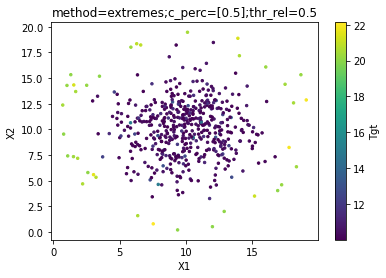

In [39]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("method=extremes;c_perc=[0.5];thr_rel=0.5")
plt.show()